<a href="https://colab.research.google.com/github/Nur9702/Postgresql/blob/main/K_Means_loyiha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

Tasodifiy nuqtalar klasterini yaratish uchun make_blobs funksiyasidan foydalanamiz. Bu funksiya quyidagi parametrlarni qabul qiladi:

n_samples - nuqtalar soni
centers - klasterlar markazi (sentroid) koordinatalari
cluster_std - markazdan standart og'ish
make_blobs funksiyasi nuqtalarning x va y koordinatalarini qaytaradi.

In [2]:
np.random.seed(0)
centroids = [[3,3], [-3, -2], [2, -3], [0, 0]]
X, y = make_blobs(n_samples=5000, centers=centroids, cluster_std=0.8)

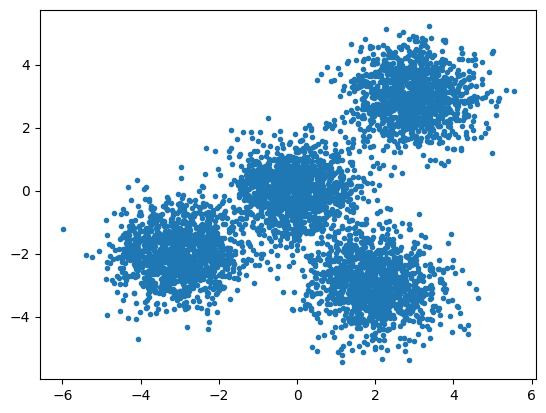

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

#k-means algoritmi
KMeans funksiyasi quyidagi parametrlarni qabul qiladi:

init - sentrodilarni tanlash usuli (k-means++ yoki random)

n_clusters - klastertlar soni

n_init - algoritmni necha marta ishga tushirish (turli sentroidlar bilan qayta-qayta ishga tushirib, modelni qurishni boshlash uchun eng yaxshi sentroidlar tanlanadi)

KMeans boshqa parametrlari haqida rasmiy sahifasidan ma'lumot olasiz: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [4]:
k_means = KMeans(init = "random", n_clusters = 4, n_init = 15)

In [5]:
k_means.fit(X)

KMeans(init='random', n_clusters=4, n_init=15)

Nuqtalar klasterlandi. Klaster raqamini ko'rish uchun .labels_ parametriga murojaat qilamiz.




In [7]:
k_means.labels_

array([3, 1, 1, ..., 2, 3, 3], dtype=int32)

Klaster markazlarini ko'rich uchun .cluster_centers_ parametriga murojaat qilamiz.


In [8]:
k_means.cluster_centers_

array([[-3.05006801e-02,  1.12353254e-03],
       [ 1.99348887e+00, -3.01067931e+00],
       [ 2.97795387e+00,  2.99317691e+00],
       [-3.01979724e+00, -1.99489798e+00]])

Algoritm topgan klaster markazlarini, biz avvaldan bergan markazlar bilan solishtiramiz:


In [9]:
print(centroids)

[[3, 3], [-3, -2], [2, -3], [0, 0]]


Deyarli bir xil. Butunlab ko'ramiz:

In [11]:
print(np.round(k_means.cluster_centers_))

[[-0.  0.]
 [ 2. -3.]
 [ 3.  3.]
 [-3. -2.]]


#Grafik chizamiz

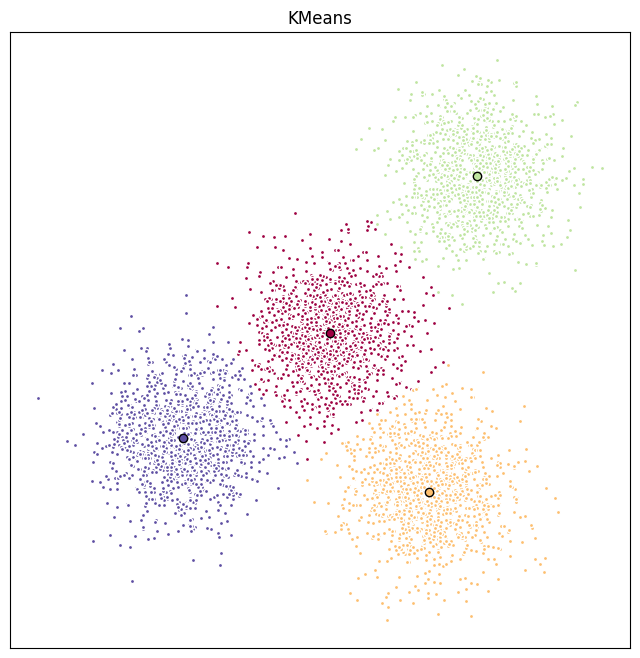

In [12]:
fig = plt.figure(figsize=(8, 8))
# Har bir klaster uchun alohida rang
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means.labels_ == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means.cluster_centers_[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

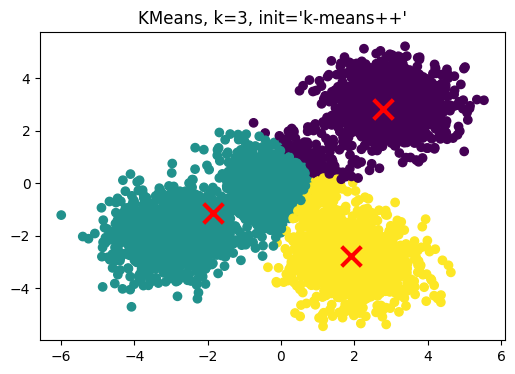

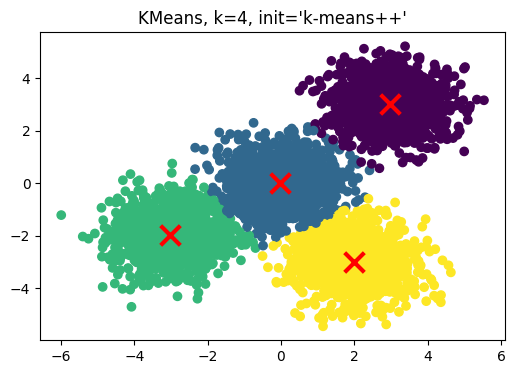

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Turli k qiymatlari uchun KMeans algoritmini ishga tushirish
for k in range(3, 5):
    # KMeans modelini yaratish
    k_means = KMeans(init="k-means++", n_clusters=k, n_init=15)

    # Modelni ma'lumotlarga moslashtirish
    k_means.fit(X)

    # Klaster markazlarini olish
    cluster_centers = k_means.cluster_centers_

    # Klaster yorliqlarini olish
    labels = k_means.labels_

    # Natijalarni chizish
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="x", s=200, linewidths=3, color="r")
    plt.title(f"KMeans, k={k}, init='k-means++'")
    plt.show()